# Homework 1

Author: @gabriella-ilena

This notebooks provides the solution to the 1st part of the MLOps Zoomcamp: 1 - Intro. In this notebook, we will explore the Yellow Taxi Trip datasets from January and February 2023.

### Library imports

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn

# Type-hinting
from typing import List

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Check pandas version
print(f"Pandas version: {pd.__version__}")

# Check sklearn version
print(f"Scikit-learn version: {sklearn.__version__}")

Pandas version: 1.4.2
Scikit-learn version: 1.0.2


In [2]:
# Ensure pyarrow is installed to read Parquet files
try:
    import pyarrow
except ImportError:
    print("pyarrow is not installed. Installing...")

    import sys
    !{sys.executable} -m pip install pyarrow

### Q1. Downloading the Data

In this part, we want to read the data files and examine how many data columns are there - what is the information we can retrieve from this dataset, what are the data types, and how many records are available.

We will use the January dataset as training data, and February dataset as validation data.

In [3]:
def read_parquet_file(file_path) -> pd.DataFrame:
    """
    Read a Parquet file and return a DataFrame.

    :param file_path: Path to the Parquet file
    :return: DataFrame containing the data from the Parquet file
    """
    df = pd.read_parquet(file_path)

    return df

def describe_dataframe(df: pd.DataFrame) -> None:
    """
    Print the description of the DataFrame (example rows, data types, null value, and shape).

    :param df: DataFrame to describe
    """
    # Examine the data types and columns of the datasets
    print("Sample rows:")
    display(df.head(5))

    print("Data types:")
    display(df.dtypes)

    # Check for null values in the DataFrame
    print("Null values in DataFrame:")
    display(df.isnull().sum())

    print("Shape:", df.shape)

In [4]:
# Define data directory
DATA_DIR = os.path.join(os.getcwd(), "data")

# Load the dataset
# Here we want to store separate dataframes of each month into separate dataframes
df_train = read_parquet_file(os.path.join(DATA_DIR, "yellow_tripdata_2023-01.parquet"))
df_validation = read_parquet_file(os.path.join(DATA_DIR, "yellow_tripdata_2023-02.parquet"))

In [5]:
# Describe the datasets
print("Training data (January):")
describe_dataframe(df_train)
print("-----------------------------")
print("Validation data (February):")
describe_dataframe(df_validation)

Training data (January):
Sample rows:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Data types:


VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

Null values in DataFrame:


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

Shape: (3066766, 19)
-----------------------------
Validation data (February):
Sample rows:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


Data types:


VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

Null values in DataFrame:


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          76817
trip_distance                0
RatecodeID               76817
store_and_fwd_flag       76817
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     76817
Airport_fee              76817
dtype: int64

Shape: (2913955, 19)


From looking at the above output, we can see that there are 19 individual columns in the dataframe.

### Q2. Computing duration

We want to find out the standard deviation of trips duration (in minutes) in January.

In [6]:
# First, we need to count the duration of trip based on the pickup and dropoff times
# The duration column should be in minutes
df_train['duration'] = (df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']).dt.total_seconds() / 60.0

# Calculate the standard deviation of the duration
std_duration = df_train['duration'].std()
print(f"Duration standard deviation: {std_duration:.2f} minutes")


Duration standard deviation: 42.59 minutes


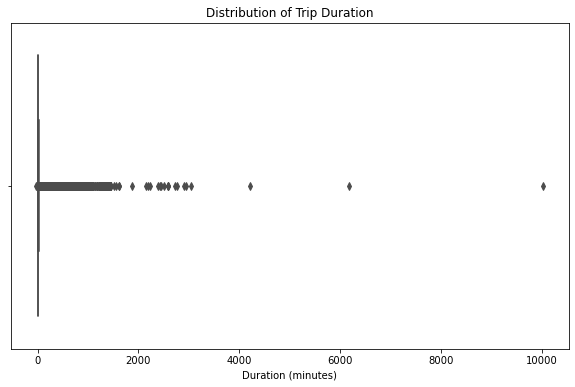

In [7]:
# Plot the distribution of the duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['duration'], color='blue')
plt.title("Distribution of Trip Duration")
plt.xlabel("Duration (minutes)")
plt.show()  


We can clearly see a few outliers in the boxplot (around 10000 minutes, 6000, 4000, ...)

### Q3. Dropping outliers

Here we want to remove outliers in the duration column, which are defined as durations that are not within 1-60 minutes (inclusive). 

In [8]:
def remove_duration_outliers(df: pd.DataFrame, column: str, lower_bound: float, upper_bound: float) -> pd.DataFrame:
    """
    Remove outliers from the DataFrame given a specific column and expected range (lower_bound, upper_bound - inclusive).

    :param df: DataFrame to clean
    :param lower_bound: Lower bound
    :param upper_bound: Upper bound
    :return: Cleaned DataFrame
    """

    # Keep only values that are within the specified range
    print(f"Initial number of rows: {len(df)}")
    keep = (df[column] >= lower_bound) & (df[column] <= upper_bound)

    # Count how many outliers are found
    print(f"Number of records within range ({lower_bound}, {upper_bound}): {keep.sum()}")

    # Check the number of rows after filtering
    df_clean = df[keep]
    percent_kept = keep.sum() / len(df_train) * 100
    print(f"Percentage of records removed: {100-percent_kept:.2f}%")
    print(f"Percentage of records kept: {percent_kept:.2f}%")

    return df_clean

Initial number of rows: 3066766
Number of records within range (1, 60): 3009173
Percentage of records removed: 1.88%
Percentage of records kept: 98.12%


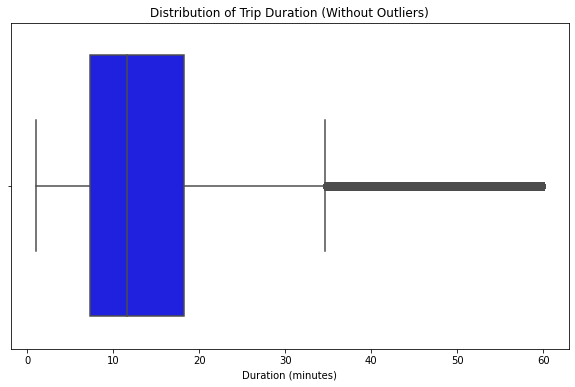

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [9]:
df_train_clean = remove_duration_outliers(df_train, 'duration', 1, 60)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train_clean['duration'], color='blue')
plt.title("Distribution of Trip Duration (Without Outliers)")
plt.xlabel("Duration (minutes)")
plt.show()  

display(df_train_clean["duration"].describe())

Now it looks better! The duration data is between 1-60 minutes, with a mean of 14.2 minutes.

### Q4. One-hot Encoding

To train a model, first we need to extract the features. We want to use the pickup and dropoff location IDs as the features for our model. Firstly, we need to one-hot encode them - the location IDs are categorical variables.

Instructions:
- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

In [10]:
FEATURES = ['PULocationID', 'DOLocationID']

In [11]:
from sklearn.feature_extraction import DictVectorizer

def transform_dataframe_to_dict(df: pd.DataFrame, columns: List[str], cast: str = str) -> List[dict]:
    """
    Transform the DataFrame into a list of dictionaries for the specified columns. If cast is str, cast the columns to string.
    :param df: DataFrame to transform
    :param columns: List of columns to include in the transformation
    :param cast: Type to cast the columns to (default is str)
    :return: List of dictionaries representing the DataFrame
    """
    # Keep only the relevant columns and cast to desired type
    df_features = df[columns].astype(cast)

    # Convert the DataFrame to a list of dictionaries
    df_dict = df_features.to_dict(orient='records')
    print("Transformed data (first 3 rows):", df_dict[:3])
    return df_dict


def train_categorical_one_hot_encode(list_dict: List[dict]) -> np.ndarray:
    """
    Train a one-hot encoder for the specified categorical columns in the DataFrame, and return the feature matrix.

    :param df: DataFrame to encode
    :param column: Column to one-hot encode
    :return: DataFrame with one-hot encoded column
    """
    # Vectorize the data
    dv = DictVectorizer(sparse=True)  # Using sparse=True for memory efficiency
    dv = dv.fit(list_dict)

    return dv

In [12]:
df_train_dict = transform_dataframe_to_dict(df_train_clean, FEATURES)

# One-hot encode the categorical features
dv = train_categorical_one_hot_encode(df_train_dict)
X_train = dv.transform(df_train_dict)

Transformed data (first 3 rows): [{'PULocationID': '161', 'DOLocationID': '141'}, {'PULocationID': '43', 'DOLocationID': '237'}, {'PULocationID': '48', 'DOLocationID': '238'}]


In [13]:
# Examine the feature matrix
X_train.shape

(3009173, 515)

The training dataset contains 3.009.173 rows and 515 columns.

### Q5. Training a model

We want to train a simple Linear Regression model with `duration` as the target variable. We will initially use default parameters.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the target variable
y_train = df_train_clean['duration'].to_numpy()

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate RMSE on the training data
y_train_preds = model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_preds, squared=False)
print(f"RMSE on training data: {rmse_train:.2f} minutes")

RMSE on training data: 7.65 minutes


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


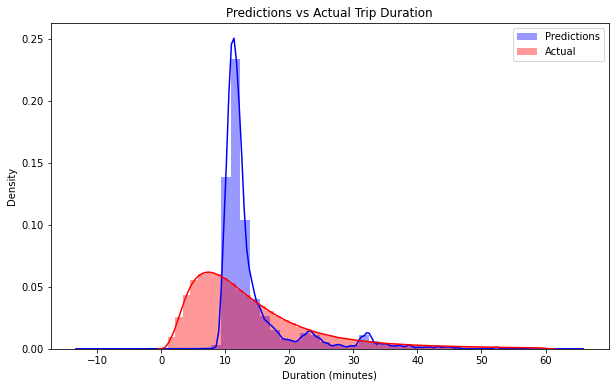

In [15]:
# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.distplot(y_train_preds, label='Predictions', color='blue', kde=True)
sns.distplot(y_train, label='Actual', color='red', kde=True)
plt.title("Predictions vs Actual Trip Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()

### Q6. Evaluating the Model

Now we want to run the trained model on the test data and evaluate the results. As above, we will use the RMSE as the evaluation metric.

In [16]:
print("Preparing validation data...")

# Prepare the validation dataset
df_validation['duration'] = (df_validation['tpep_dropoff_datetime'] - df_validation['tpep_pickup_datetime']).dt.total_seconds() / 60.0
df_validation_clean = remove_duration_outliers(df_validation, 'duration', 1, 60)

df_val_dict = transform_dataframe_to_dict(df_validation_clean, FEATURES)

# One-hot encode the categorical features
X_val = dv.transform(df_val_dict)
print(X_val.shape)

Preparing validation data...
Initial number of rows: 2913955
Number of records within range (1, 60): 2855951
Percentage of records removed: 6.87%
Percentage of records kept: 93.13%
Transformed data (first 3 rows): [{'PULocationID': '142', 'DOLocationID': '163'}, {'PULocationID': '132', 'DOLocationID': '26'}, {'PULocationID': '161', 'DOLocationID': '145'}]
(2855951, 515)


In [17]:
# Define the target variable for validation
y_val = df_validation_clean['duration'].to_numpy()

In [19]:
# Run the model
y_val_preds = model.predict(X_val)
rmse_val = mean_squared_error(y_val, y_val_preds, squared=False)
print(f"RMSE on validation data: {rmse_val:.2f} minutes")

RMSE on validation data: 7.81 minutes


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


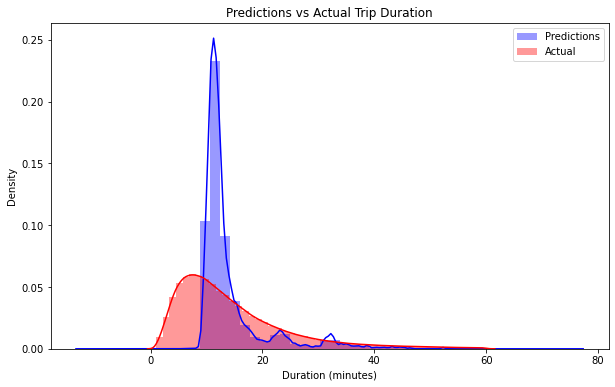

In [20]:
# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.distplot(y_val_preds, label='Predictions', color='blue', kde=True)
sns.distplot(y_val, label='Actual', color='red', kde=True)
plt.title("Predictions vs Actual Trip Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()